<a href="https://colab.research.google.com/github/pricilrenee/11181071_Irene_DM_IF-ITK/blob/main/11181071_Irene_DM_IF_ITK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# logistic & knn

In [66]:
# Meng-import library yang akan digunakan

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()

In [65]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
#Label Name
targetNames = iris.target_names
print(f"['0','1','2'] : {targetNames}")

['0','1','2'] : ['setosa' 'versicolor' 'virginica']


In [67]:
#Mendefinisikan x dan y
from sklearn.model_selection import train_test_split

X = df.drop(["target"], axis = 1).values
y = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [68]:
#Menskalakan data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
#Algoritma Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = "lbfgs", class_weight = "balanced")
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9736842105263158


In [70]:
#Algoritma K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9736842105263158


# metode k-nearest neighbour

In [6]:
# Meng-import library yang akan digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Memuat iris data yang terdapat pada sklearn datasets dan menyimpannya dalam DataFrame

from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#Label Name
targetNames = iris.target_names
print(f"['0','1','2'] : {targetNames}")

['0','1','2'] : ['setosa' 'versicolor' 'virginica']


In [9]:
# Memisahkan data X dan Y

X = df.drop('target', axis=1)
y = df.target

In [10]:
# Menghitung jarak antara 2 point

def minkowski_distance(a, b, p=1):
    
    # Menyimpan jumlah dimensi yang ada
    dim = len(a)
    
    # Mengatur jarak awalnya sebesar 0
    distance = 0
    
    # Menghitung Minkowksi Distance menggunakan parameter P
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance


# Melakukan test pada fungsi diatas

minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=1)

0.6999999999999993

In [11]:
# Menentukan titik uji

test_pt = [4.8, 2.7, 2.5, 0.7]

# Menghitung Jarak antara titik uji (test_pt) yang ditentukan dengan semua titik X

distances = []

for i in X.index:
    
    distances.append(minkowski_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


In [12]:
# Menemukan 5 tetangga terdekat

df_nn = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nn

,dist
98,1.4
57,1.5
93,1.7
24,1.8
30,1.8


In [13]:
from collections import Counter

# Membuat objek penghitung untuk melacak label

counter = Counter(y[df_nn.index])

# Mendapatkan label paling umum dari semua tetangga terdekat

counter.most_common()[0][0]

1

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Membagi datanya - 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

# Mengskala data X

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    # Counter untuk membantu dengan voting label
    from collections import Counter
    
    # Melakukan prediksi untuk test data
    # Diperlukan output 1 prediksi per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Menyimpan Jarak pada DataFrame
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Mengurutkan Jarak, dan hanya mempertimbangkan K titik terdekat
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Buat objek penghitung untuk melacak label k tetangga terdekat
        counter = Counter(y_train[df_nn.index])

        # Mendapatkan label paling umum dari semua tetangga terdekat
        prediction = counter.most_common()[0][0]
        
        # Menambahkan hasil prediksi ke daftar keluaran
        y_hat_test.append(prediction)
        
    return y_hat_test


# Melakukan prediksi pada dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=3, p=1)

print(y_hat_test)

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]


In [16]:
# Mendapatkan hasil akurasi, confusion matrix, dan klasifikasi report

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

acc = accuracy_score(y_test, y_hat_test)
print(f"Accuracy : {acc}")
cfm = confusion_matrix(y_test, y_hat_test)
print("Confusion Matrix : ")
print(cfm)
print("Classification Report : ")
clr = classification_report(y_test,y_hat_test, target_names=targetNames)
print(clr)

Accuracy : 0.9736842105263158
Confusion Matrix : 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [17]:
# Melakukan test untuk melihat dan membandingkan hasil bila menggunakan sklearn.neighbors.KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, p=1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

acc_sklearn = accuracy_score(y_test, y_pred_test)
print(f"SKlearn KNN Accuracy : {acc_sklearn}")
cfm_sklearn = confusion_matrix(y_test, y_pred_test)
print("SKlearn KNN Confusion Matrix : ")
print(cfm_sklearn)
clr_sklearn = classification_report(y_test,y_pred_test, target_names=targetNames)
print("SKlearn KNN Classification Report : ")
print(clr_sklearn)

SKlearn KNN Accuracy : 0.9736842105263158
SKlearn KNN Confusion Matrix : 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
SKlearn KNN Classification Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



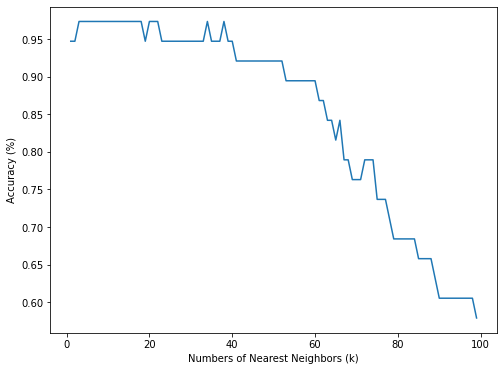

In [18]:
# Mendapatkan skor akurasi dari k

accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('Numbers of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');